# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 1/8/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 1/8/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2446,38928341,6.3
Albania,6623,2877800,230.1
Algeria,3800,43851043,8.7
Andorra,683,77265,884.0
Angola,917,32866268,2.8
Antigua and Barbuda,12,97928,12.3
Argentina,125085,45195777,276.8
Armenia,4066,2963234,137.2
Australia,274,25459700,1.1


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Czechia,142032,10708982,1326.3
San Marino,397,33938,1169.8
Slovenia,22445,2078932,1079.6
United Kingdom,703509,67886004,1036.3
Panama,44313,4314768,1027.0
Ireland,50490,4937796,1022.5
Lithuania,27608,2722291,1014.1
Sweden,93423,10099270,925.0
Israel,78693,8655541,909.2


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

1/4/21    1796216.0
1/5/21    1814565.0
1/6/21    1841228.0
1/7/21    1886561.0
1/8/21    1905638.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

12/26/20        NaN
12/27/20    12399.0
12/28/20    14004.0
12/29/20    19466.0
12/30/20    49044.0
12/31/20    19367.0
1/1/21       2117.0
1/2/21      10903.0
1/3/21      10356.0
1/4/21      12320.0
1/5/21      18349.0
1/6/21      26663.0
1/7/21      45333.0
1/8/21      19077.0
Name: Germany, dtype: float64

<AxesSubplot:>

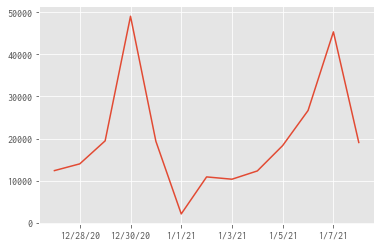

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

309.60346877913184